# **About Dataset & Project**

- You are working as a data scientist in a risk analyst team in a finance industry.
- Your company generates profit by giving loans to customers.
- However, your company might suffer loss if the customer did not pay the loan back (we called it as default customer)
- To minimize the loss, the simple thing to do is to prevent bad applicants (who later become a default customer) get the loan.
- As a data scientst, you want to create a classifier model to classify good or bad applicants from the given customer data to minimize the potential loss.

Here are the input data:

| Feature Name                  | Description                    |
|------------------------------|--------------------------------|
| person_age                   | Age                            |
| person_income                | Annual Income                  |
| person_home_ownership        | Home ownership                 |
| person_emp_length            | Employment length (in years)   |
| loan_intent                  | Loan intent                    |
| loan_grade                   | Loan grade                     |
| loan_amnt                    | Loan amount                    |
| loan_int_rate                | Interest rate                  |
| loan_percent_income          | Percent income                 |
| cb_person_default_on_file    | Historical default             |
| cb_preson_cred_hist_length   | Credit history length          |

In [1]:
import os
from pathlib import Path

project_root = Path('..').resolve()
os.chdir(project_root) 

print('Current working directory:', os.getcwd())

Current working directory: C:\Users\ibnum\Desktop\Material Learning\Credit Risk Project


# **1. Import Modules**

In [2]:
import pandas as pd
from src.config import config
from src.data import clean_data, load_data
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Data Preparation**

## 2.1 Load Data

In [3]:
# load data
df = load_data.read_data(file_path=config.RAW_DATA)
df.head()

Data loaded succesfully from data/raw/credit_risk_dataset.csv!
Data shape: (32581, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# check and remove duplicates
df = clean_data.remove_duplicates(data=df)
df

Data shape before dropping duplicates: (32581, 12)
Total duplicates in dataset: 165

Removing duplicates....
Duplicates have dropped. Data shape after dropping duplicates: (32416, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## 2.2 Exploratory Data Analysis (EDA)

In [5]:
# find out the details of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [6]:
# check missing values in numerical columns
df[config.NUM_COLS].isna().sum()

person_age                       0
person_income                    0
person_emp_length              887
loan_amnt                        0
loan_int_rate                 3095
loan_percent_income              0
cb_person_cred_hist_length       0
dtype: int64

We can impute the numerical missing data in the preprocessing step later

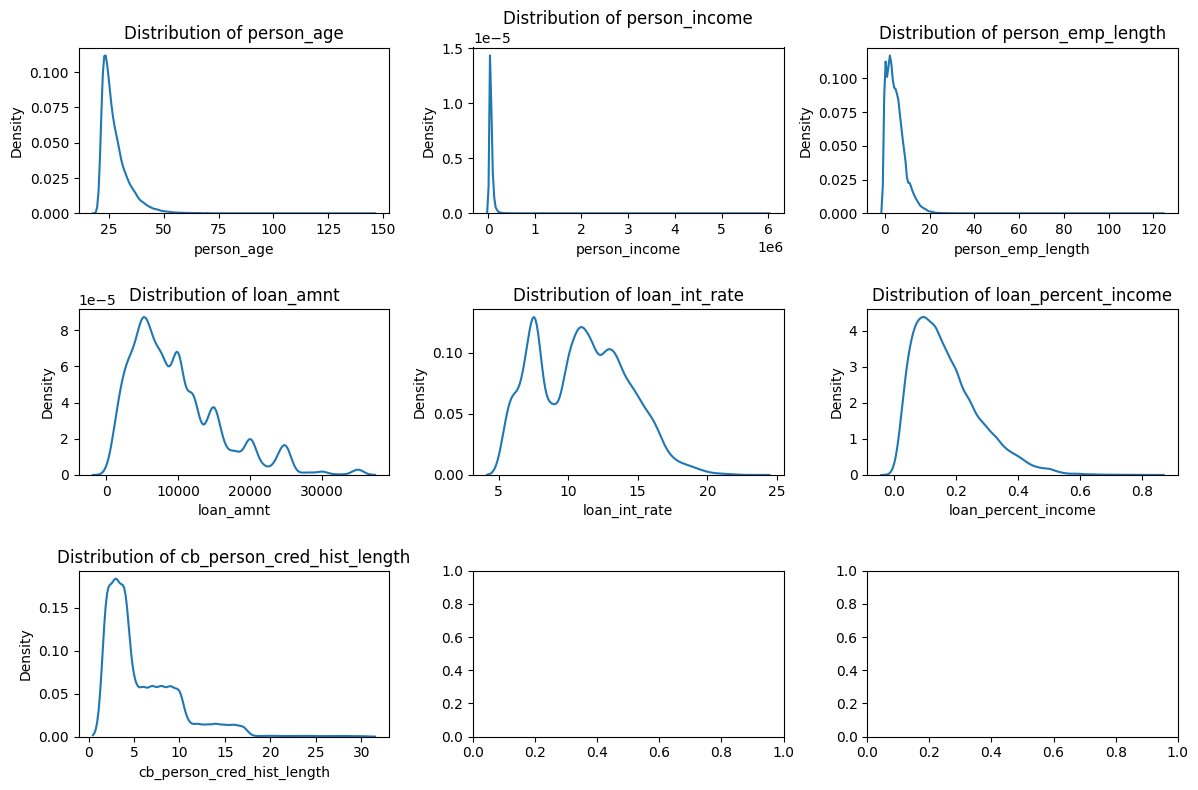

In [7]:
# check the distribution of each numerical features
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,8))
axes = ax.flatten()

for i, col in enumerate(df[config.NUM_COLS]):
    sns.kdeplot(df[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [8]:
# check data description for more details
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


**Gathered insights:**
- There is a person with age of 144 years old. This is clearly anomalous data that we will be dropping.
- 123 years of employment length is not possible, so this will be classified as anomalous data. We will drop this data as well
- Based on those insights, I decide to drop the data both of person_age and person_emp_length more than 100 because I think there is no possibility of human being are able to reach those conditions.

In [9]:
# dropping the anomalous data (person age and emp length > 100)
dropped_data = df[(df['person_age'] > 100) | (df['person_emp_length'] > 100)]
dropped_idx_list = [i for i in dropped_data.index]

print(f'Total of data index will be dropped: {len(dropped_idx_list)} \n{dropped_idx_list}')
print(f'\nData shape before dropping anomalous data: {df.shape}')
df = df.drop(index=dropped_idx_list)
print(f'Data shape after dropping anomalous data: {df.shape}')

Total of data index will be dropped: 7 
[0, 81, 183, 210, 575, 747, 32297]

Data shape before dropping anomalous data: (32416, 12)
Data shape after dropping anomalous data: (32409, 12)


In [10]:
# check missing values on categorical columns
df[config.CAT_COLS].isna().sum()

loan_intent                  0
loan_grade                   0
cb_person_default_on_file    0
person_home_ownership        0
dtype: int64

There is no missing data in categorical columns

In [11]:
for col in df[config.CAT_COLS].columns:
    print(f'{df[col].value_counts(normalize=True)}\n')

loan_intent
EDUCATION            0.197754
MEDICAL              0.186430
VENTURE              0.175229
PERSONAL             0.169583
DEBTCONSOLIDATION    0.160110
HOMEIMPROVEMENT      0.110895
Name: proportion, dtype: float64

loan_grade
A    0.330217
B    0.320405
C    0.198587
D    0.111667
E    0.029714
F    0.007436
G    0.001975
Name: proportion, dtype: float64

cb_person_default_on_file
N    0.823228
Y    0.176772
Name: proportion, dtype: float64

person_home_ownership
RENT        0.505230
MORTGAGE    0.412416
OWN         0.079083
OTHER       0.003271
Name: proportion, dtype: float64



The categorical data is already well-represented and easy to understand. For this initial exploration stage, I choose not to perform feature engineering yet, so we will proceed directly to the preprocessing step

Check separation of data

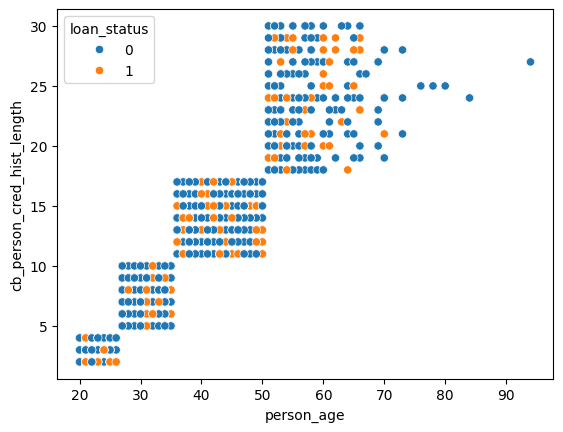

In [14]:
# use scatter plot
sns.scatterplot(
    data=df,
    x='person_age',
    y='cb_person_cred_hist_length',
    hue='loan_status'
)

plt.show()

The data is unlinearly separated. For this project, I will be using ensemble model as the main focus to predict default or non-default credit customers.

## 2.3 Save Cleaned Data

In [12]:
# save cleaned data to cleaned folder path
df.to_csv(config.CLEAN_DATA)
print('Cleaned data has been successfully saved into:', config.CLEAN_DATA)

Cleaned data has been successfully saved into: data/processed/credit_risk_cleaned.csv


Now we have already finished our exploration and cleaning towards dataset, we can continue the modeling process to the different notebooks.